In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

# Group Exercises

## Exercise

One way to model the price of a single stock is to use the geometric Brownian motion model
$$
d S_t = S_t( \mu dt + \sigma d W_t ).
$$
Devise your own model for a stock price $S_t$ where the *volatility* term $\sigma$ is itself stochastic.
There is no single right answer to this question, you are being asked to create your own model.

Using your model, simulate the stock price at the final time $S_T$ and plot a histogram of the result. You
should also plot a histogram of $Z_T:=\log S_T$.

Generate a Q-Q plot to see if $Z_T$ is normally distributed in your model.

A Q-Q plot shows the quantiles
of one distribution against another. If they are the same distribution, you will get a line
at 45 degrees. So these plots can be used to test if a random variable has a given distribution.
Here is a process for generating a Q-Q plot to see if $Z_T$ is normally distributed:

* Generate $N$ samples of $Z_T$ and store them in a vector `Z`
* Sort the vector `Z`
* Divide the interval $[0,1]$ into $N$ intervals and let the vector `U` contain the midpoints of each interval in order. `U` will have length $N$.
* Create a vector `N` by applying the inverse distribution function of the normal distribution
to `U`
* Plot `N` against the sorted vector `Z`.

If $Z_T$ is normally distributed, the resulting plot will be approximately a straight line.

### Solution

The simplest model I can think of has $\sigma_t$ simply following a Geometric Brownian motion
$$
\begin{split}
d \sigma_t &= c \sigma_t \, dW^1_t \\
d S_t &= S_t(\mu \, dt + \sigma_t \, dW^2_t).
\end{split}
$$
For simplicity I'd assume $W^1_t$ and $W^2_t$ are independent. The reason I have decided against Brownian motion
as a model for $\sigma_t$ is to avoid the stock every becoming riskless even for a moment.

In [100]:
c = 0.3
mu = 0.08
sigma0 = 0.2
S0 = 100
T = 1

n_simulations = 10000
n_steps = 100
dt = T/n_steps
sigma = np.zeros((n_simulations,n_steps+1))
S = np.zeros((n_simulations,n_steps+1))
S[:,0] = S0
sigma[:,0] = sigma0
t = np.linspace(0,T,n_steps+1)
for i in range(0,n_steps):
    eps1 = np.random.randn(n_simulations)
    eps2 = np.random.randn(n_simulations)
    sigma[:,i+1]=sigma[:,i] + c *sigma[:,i] *sqrt(dt)*eps1
    S[:,i+1]=S[:,i] + S[:,i]*(mu*dt + sigma[:,i]*sqrt(dt)*eps2)


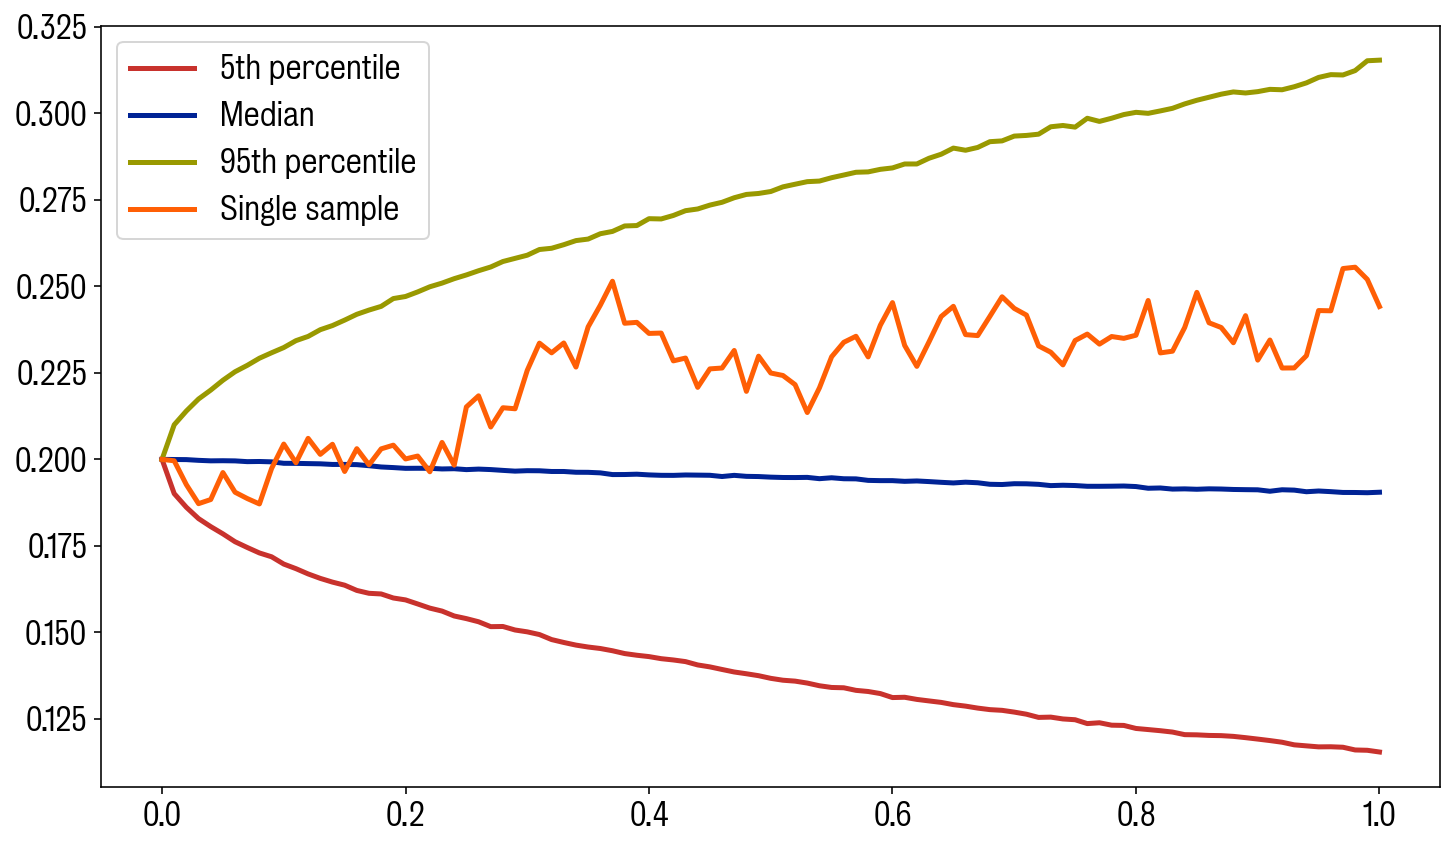

In [101]:
def fan_diagram( X, t, title ):
    lower = np.percentile(X,5, axis=0)
    median = np.percentile(X,50, axis=0)
    upper = np.percentile(X,95, axis=0)
    plt.plot(t, lower, label='5th percentile' )
    plt.plot(t, median, label='Median' )
    plt.plot(t, upper, label='95th percentile' )
    plt.plot(t, X[0,:], label='Single sample')
    plt.legend()

fan_diagram( sigma, t, 'Simulated Volatility $\sigma_t$')

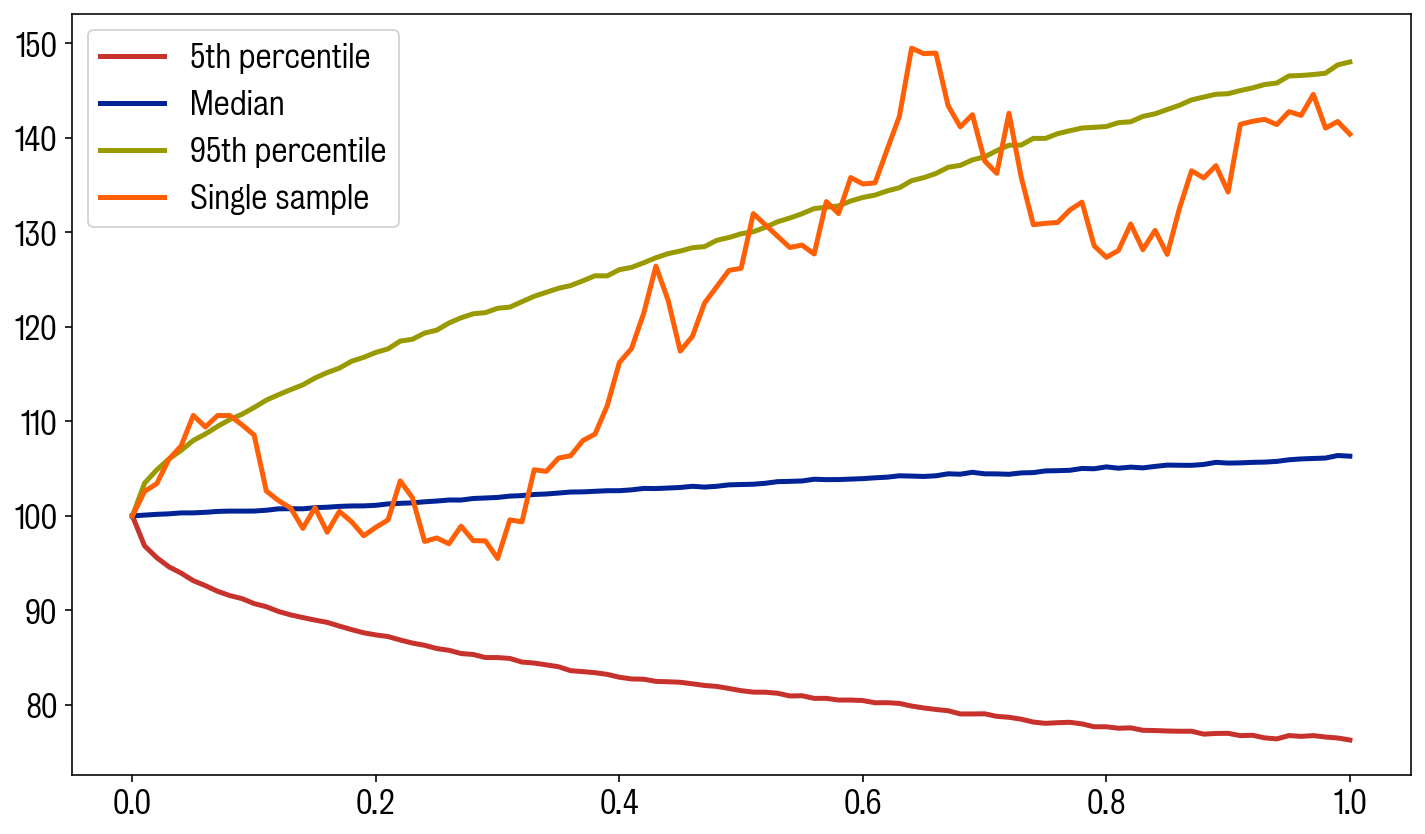

In [102]:
fan_diagram( S, t, 'Simulated Stock Price $S_t$')

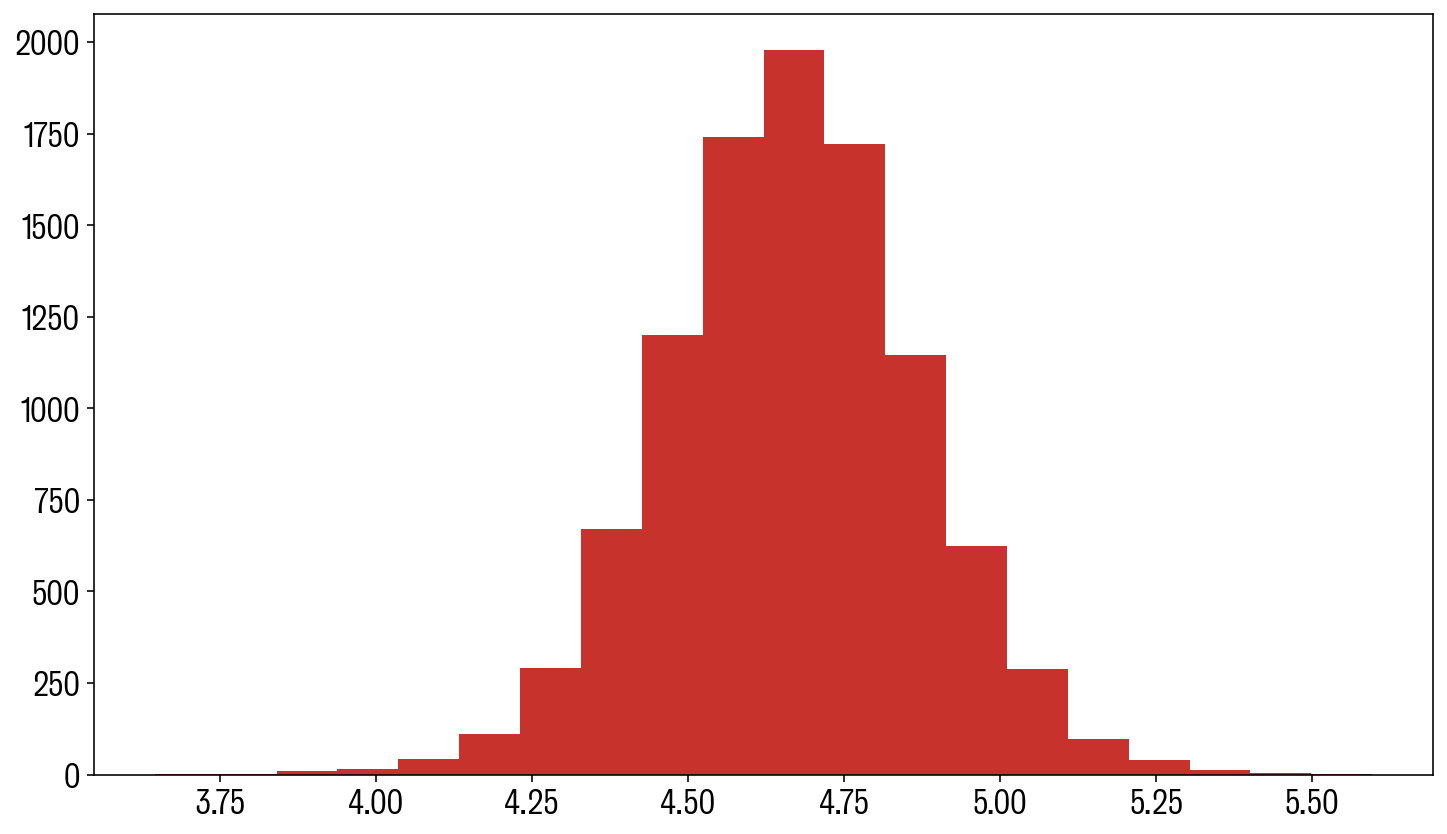

In [103]:
Z = np.log(S)
final_Z = plt.hist(Z[:,-1], bins=20);

Text(0, 0.5, 'Model percentiles')

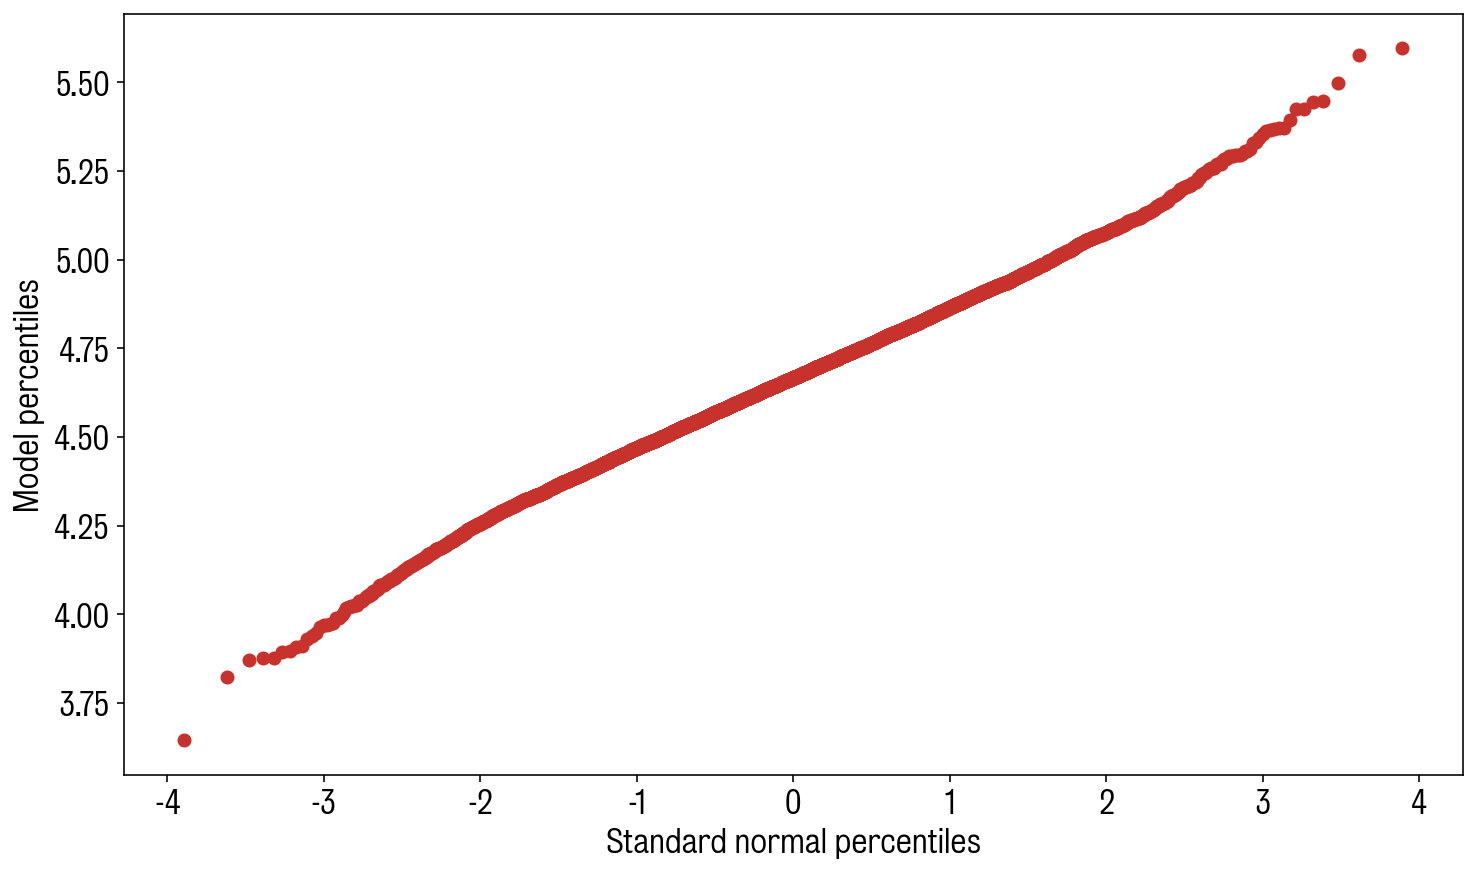

In [104]:
import scipy.stats

midpoints = np.arange(1/(2*n_simulations),1,1/n_simulations)
U = scipy.stats.norm.ppf( midpoints )
V = np.sort( Z[:,-1])
plt.scatter(U,V)
plt.xlabel('Standard normal percentiles')
plt.ylabel('Model percentiles')